In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()
print(type(data))
print('\n############## data ###############\n')
print(data.data)
#print(dir(data))
print('\n############## feature names ###############\n')
print(data.feature_names)

<class 'sklearn.utils.Bunch'>

############## data ###############

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

############## feature names ###############

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst c

In [4]:
keys_data_lst = list(data.keys())
print(keys_data_lst)

['target_names', 'filename', 'data', 'DESCR', 'target', 'feature_names']


In [5]:
X = data.data
y = data.target
print(X[5], y[5])

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01] 0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.66, 
                                                    random_state=42)

In [7]:
# feature scaling:
# fit and transform the X_train
# only transform the X_test (Not exposing X_train to the X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# here we create the model for linear classification
input_shape = np.shape(X)[1]
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_shape,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
# here we compile our model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [10]:
np.shape(X_train)

(375, 30)

In [11]:
# here we fit our model to the training data
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Train on 375 samples, validate on 194 samples
Epoch 1/150
375/375 [==============================] - 1s 3ms/sample - loss: 1.3267 - accuracy: 0.1280 - val_loss: 1.3028 - val_accuracy: 0.1701
Epoch 2/150
375/375 [==============================] - 0s 233us/sample - loss: 1.2164 - accuracy: 0.1680 - val_loss: 1.1930 - val_accuracy: 0.2320
Epoch 3/150
375/375 [==============================] - 0s 227us/sample - loss: 1.1135 - accuracy: 0.2133 - val_loss: 1.0924 - val_accuracy: 0.2680
Epoch 4/150
375/375 [==============================] - 0s 177us/sample - loss: 1.0227 - accuracy: 0.3013 - val_loss: 0.9998 - val_accuracy: 0.3196
Epoch 5/150
375/375 [==============================] - 0s 216us/sample - loss: 0.9336 - accuracy: 0.3680 - val_loss: 0.9209 - val_accuracy: 0.3918
Epoch 6/150
375/375 [==============================] - 0s 211us/sample - loss: 0.8607 - accuracy: 0.4533 - val_loss: 0.8468 - val_accuracy: 0.4433
Epoch 7/150
375/375 [==============================] - 0s 181us/sample - l

375/375 [==============================] - 0s 183us/sample - loss: 0.1779 - accuracy: 0.9573 - val_loss: 0.1738 - val_accuracy: 0.9536
Epoch 57/150
375/375 [==============================] - 0s 238us/sample - loss: 0.1759 - accuracy: 0.9573 - val_loss: 0.1715 - val_accuracy: 0.9536
Epoch 58/150
375/375 [==============================] - 0s 159us/sample - loss: 0.1738 - accuracy: 0.9600 - val_loss: 0.1694 - val_accuracy: 0.9536
Epoch 59/150
375/375 [==============================] - 0s 149us/sample - loss: 0.1719 - accuracy: 0.9600 - val_loss: 0.1672 - val_accuracy: 0.9485
Epoch 60/150
375/375 [==============================] - 0s 173us/sample - loss: 0.1701 - accuracy: 0.9600 - val_loss: 0.1652 - val_accuracy: 0.9485
Epoch 61/150
375/375 [==============================] - 0s 140us/sample - loss: 0.1683 - accuracy: 0.9600 - val_loss: 0.1632 - val_accuracy: 0.9485
Epoch 62/150
375/375 [==============================] - 0s 151us/sample - loss: 0.1665 - accuracy: 0.9600 - val_loss: 0.1613 

375/375 [==============================] - 0s 91us/sample - loss: 0.1177 - accuracy: 0.9733 - val_loss: 0.1075 - val_accuracy: 0.9742
Epoch 112/150
375/375 [==============================] - 0s 95us/sample - loss: 0.1171 - accuracy: 0.9733 - val_loss: 0.1069 - val_accuracy: 0.9794
Epoch 113/150
375/375 [==============================] - 0s 95us/sample - loss: 0.1165 - accuracy: 0.9733 - val_loss: 0.1063 - val_accuracy: 0.9794
Epoch 114/150
375/375 [==============================] - 0s 96us/sample - loss: 0.1160 - accuracy: 0.9733 - val_loss: 0.1056 - val_accuracy: 0.9794
Epoch 115/150
375/375 [==============================] - 0s 93us/sample - loss: 0.1154 - accuracy: 0.9733 - val_loss: 0.1050 - val_accuracy: 0.9794
Epoch 116/150
375/375 [==============================] - 0s 111us/sample - loss: 0.1149 - accuracy: 0.9733 - val_loss: 0.1045 - val_accuracy: 0.9794
Epoch 117/150
375/375 [==============================] - 0s 97us/sample - loss: 0.1143 - accuracy: 0.9733 - val_loss: 0.1039 

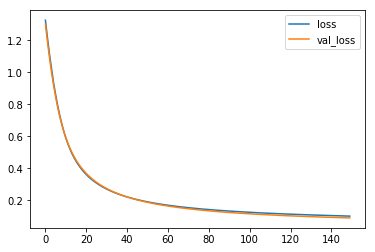

In [12]:
# let's check how our model performs
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

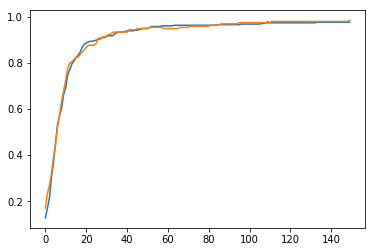

In [13]:
# we can also take a look at the model accuracy
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
# plt.legend()

Model Prediction

The approach to evaluate the performance of a classification (logistic regression) model.

In [15]:
pred = model.predict(X_test)
print(pred)

[[8.4183317e-01]
 [3.3457377e-03]
 [4.9813088e-02]
 [9.8220164e-01]
 [9.9472624e-01]
 [5.7467639e-07]
 [1.2377832e-05]
 [1.3682492e-01]
 [4.4308853e-01]
 [9.8502928e-01]
 [9.0632737e-01]
 [9.9857800e-02]
 [9.5475900e-01]
 [2.0398939e-01]
 [9.8240775e-01]
 [2.5793028e-03]
 [9.7790658e-01]
 [9.9800557e-01]
 [9.9982065e-01]
 [2.5682396e-04]
 [7.8492874e-01]
 [9.4023168e-01]
 [8.0568252e-06]
 [9.9808407e-01]
 [9.8019183e-01]
 [9.5017761e-01]
 [9.7905868e-01]
 [9.6541172e-01]
 [9.6715194e-01]
 [8.6142786e-04]
 [9.7903204e-01]
 [9.9593508e-01]
 [9.8171449e-01]
 [9.6744967e-01]
 [9.9534339e-01]
 [9.8377419e-01]
 [3.8271931e-01]
 [9.8736459e-01]
 [8.0624688e-03]
 [8.4440440e-01]
 [9.9415344e-01]
 [5.0947681e-02]
 [9.5897049e-01]
 [9.8896468e-01]
 [8.7265015e-01]
 [9.6036196e-01]
 [9.9238831e-01]
 [9.9364328e-01]
 [9.1791546e-01]
 [9.8511446e-01]
 [9.5213298e-03]
 [9.8068725e-05]
 [5.8337718e-01]
 [8.5743439e-01]
 [9.9549198e-01]
 [9.6367890e-01]
 [9.9329972e-01]
 [2.6340862e-07]
 [2.6774058e-0

In [16]:
# to make the comparision, we should round and flatten the prediction
pred = np.round(pred).flatten()
print(pred)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1.]


In [17]:
# calculate the accuracy of the model and 
# compare it to built-in evaluate() funtion
acc = np.mean(pred == y_test)
evalu = model.evaluate(X_test, y_test)
print('the accuracy that we calculate: {}'.format(acc))
print('what evaluate() returns: {}'.format(evalu))

194/194 [==============================] - 0s 60us/sample - loss: 0.0889 - accuracy: 0.9845
the accuracy that we calculate: 0.9845360824742269
what evaluate() returns: [0.08891732448270333, 0.9845361]
